In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [122]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [123]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [124]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [125]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [126]:
insurance_data.isnull().mean()*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.199751
Age                      0.000000
Claim                    0.000000
dtype: float64

In [127]:
test_data.isnull().mean()*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.286003
Age                      0.000000
dtype: float64

In [128]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [129]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                4546 non-null   object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [130]:
test_data.shape

(15832, 10)

In [131]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [132]:
numerical_feature = [feature for feature in insurance_data.columns if insurance_data[feature].dtype!='O']
print("The number of numerical features are",len(numerical_feature))
insurance_data[numerical_feature].head()

The number of numerical features are 5


,Duration,Net Sales,Commision (in value),Age,Claim
0,61,19.8,11.88,29,0
1,93,63.0,0.00,36,0
2,22,22.0,0.00,25,0
3,14,54.5,13.63,24,0
4,90,10.0,0.00,23,0


In [133]:
for feature in insurance_data.columns:
  print(feature,":",insurance_data[feature].nunique(),"\n")

Agency : 16 

Agency Type : 2 

Distribution Channel : 2 

Product Name : 26 

Duration : 442 

Destination : 141 

Net Sales : 1005 

Commision (in value) : 922 

Gender : 2 

Age : 88 

Claim : 2 



In [134]:
features = [feature for feature in insurance_data.columns if insurance_data[feature].nunique()<=2 and insurance_data[feature].dtype =='O']
print(features,'\n'*2)
for i in features:
  print(i,':' ,insurance_data[i].unique(),"\n")

['Agency Type', 'Distribution Channel', 'Gender'] 


Agency Type : ['Travel Agency' 'Airlines'] 

Distribution Channel : ['Online' 'Offline'] 

Gender : [nan 'M' 'F'] 



In [135]:
insurance_data.drop('Gender',axis=1,inplace = True)
test_data.drop('Gender',axis = 1,inplace = True)

In [136]:
categorical_feature = [feature for feature in insurance_data.columns if insurance_data[feature].dtype=='O']
insurance_data[categorical_feature].head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,UNITED KINGDOM
1,EPX,Travel Agency,Online,Cancellation Plan,NEW ZEALAND
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,UNITED STATES
3,C2B,Airlines,Online,Silver Plan,SINGAPORE
4,EPX,Travel Agency,Online,Cancellation Plan,VIET NAM


In [137]:
for i in categorical_feature:
  print(i,':', insurance_data[i].nunique(),'\n')

Agency : 16 

Agency Type : 2 

Distribution Channel : 2 

Product Name : 26 

Destination : 141 



In [138]:
import seaborn as sns

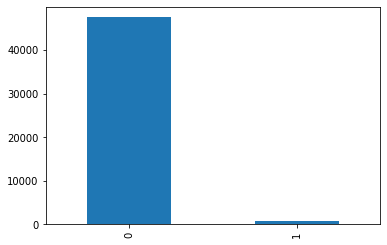

In [139]:
insurance_data.Claim.value_counts().plot(kind='bar')

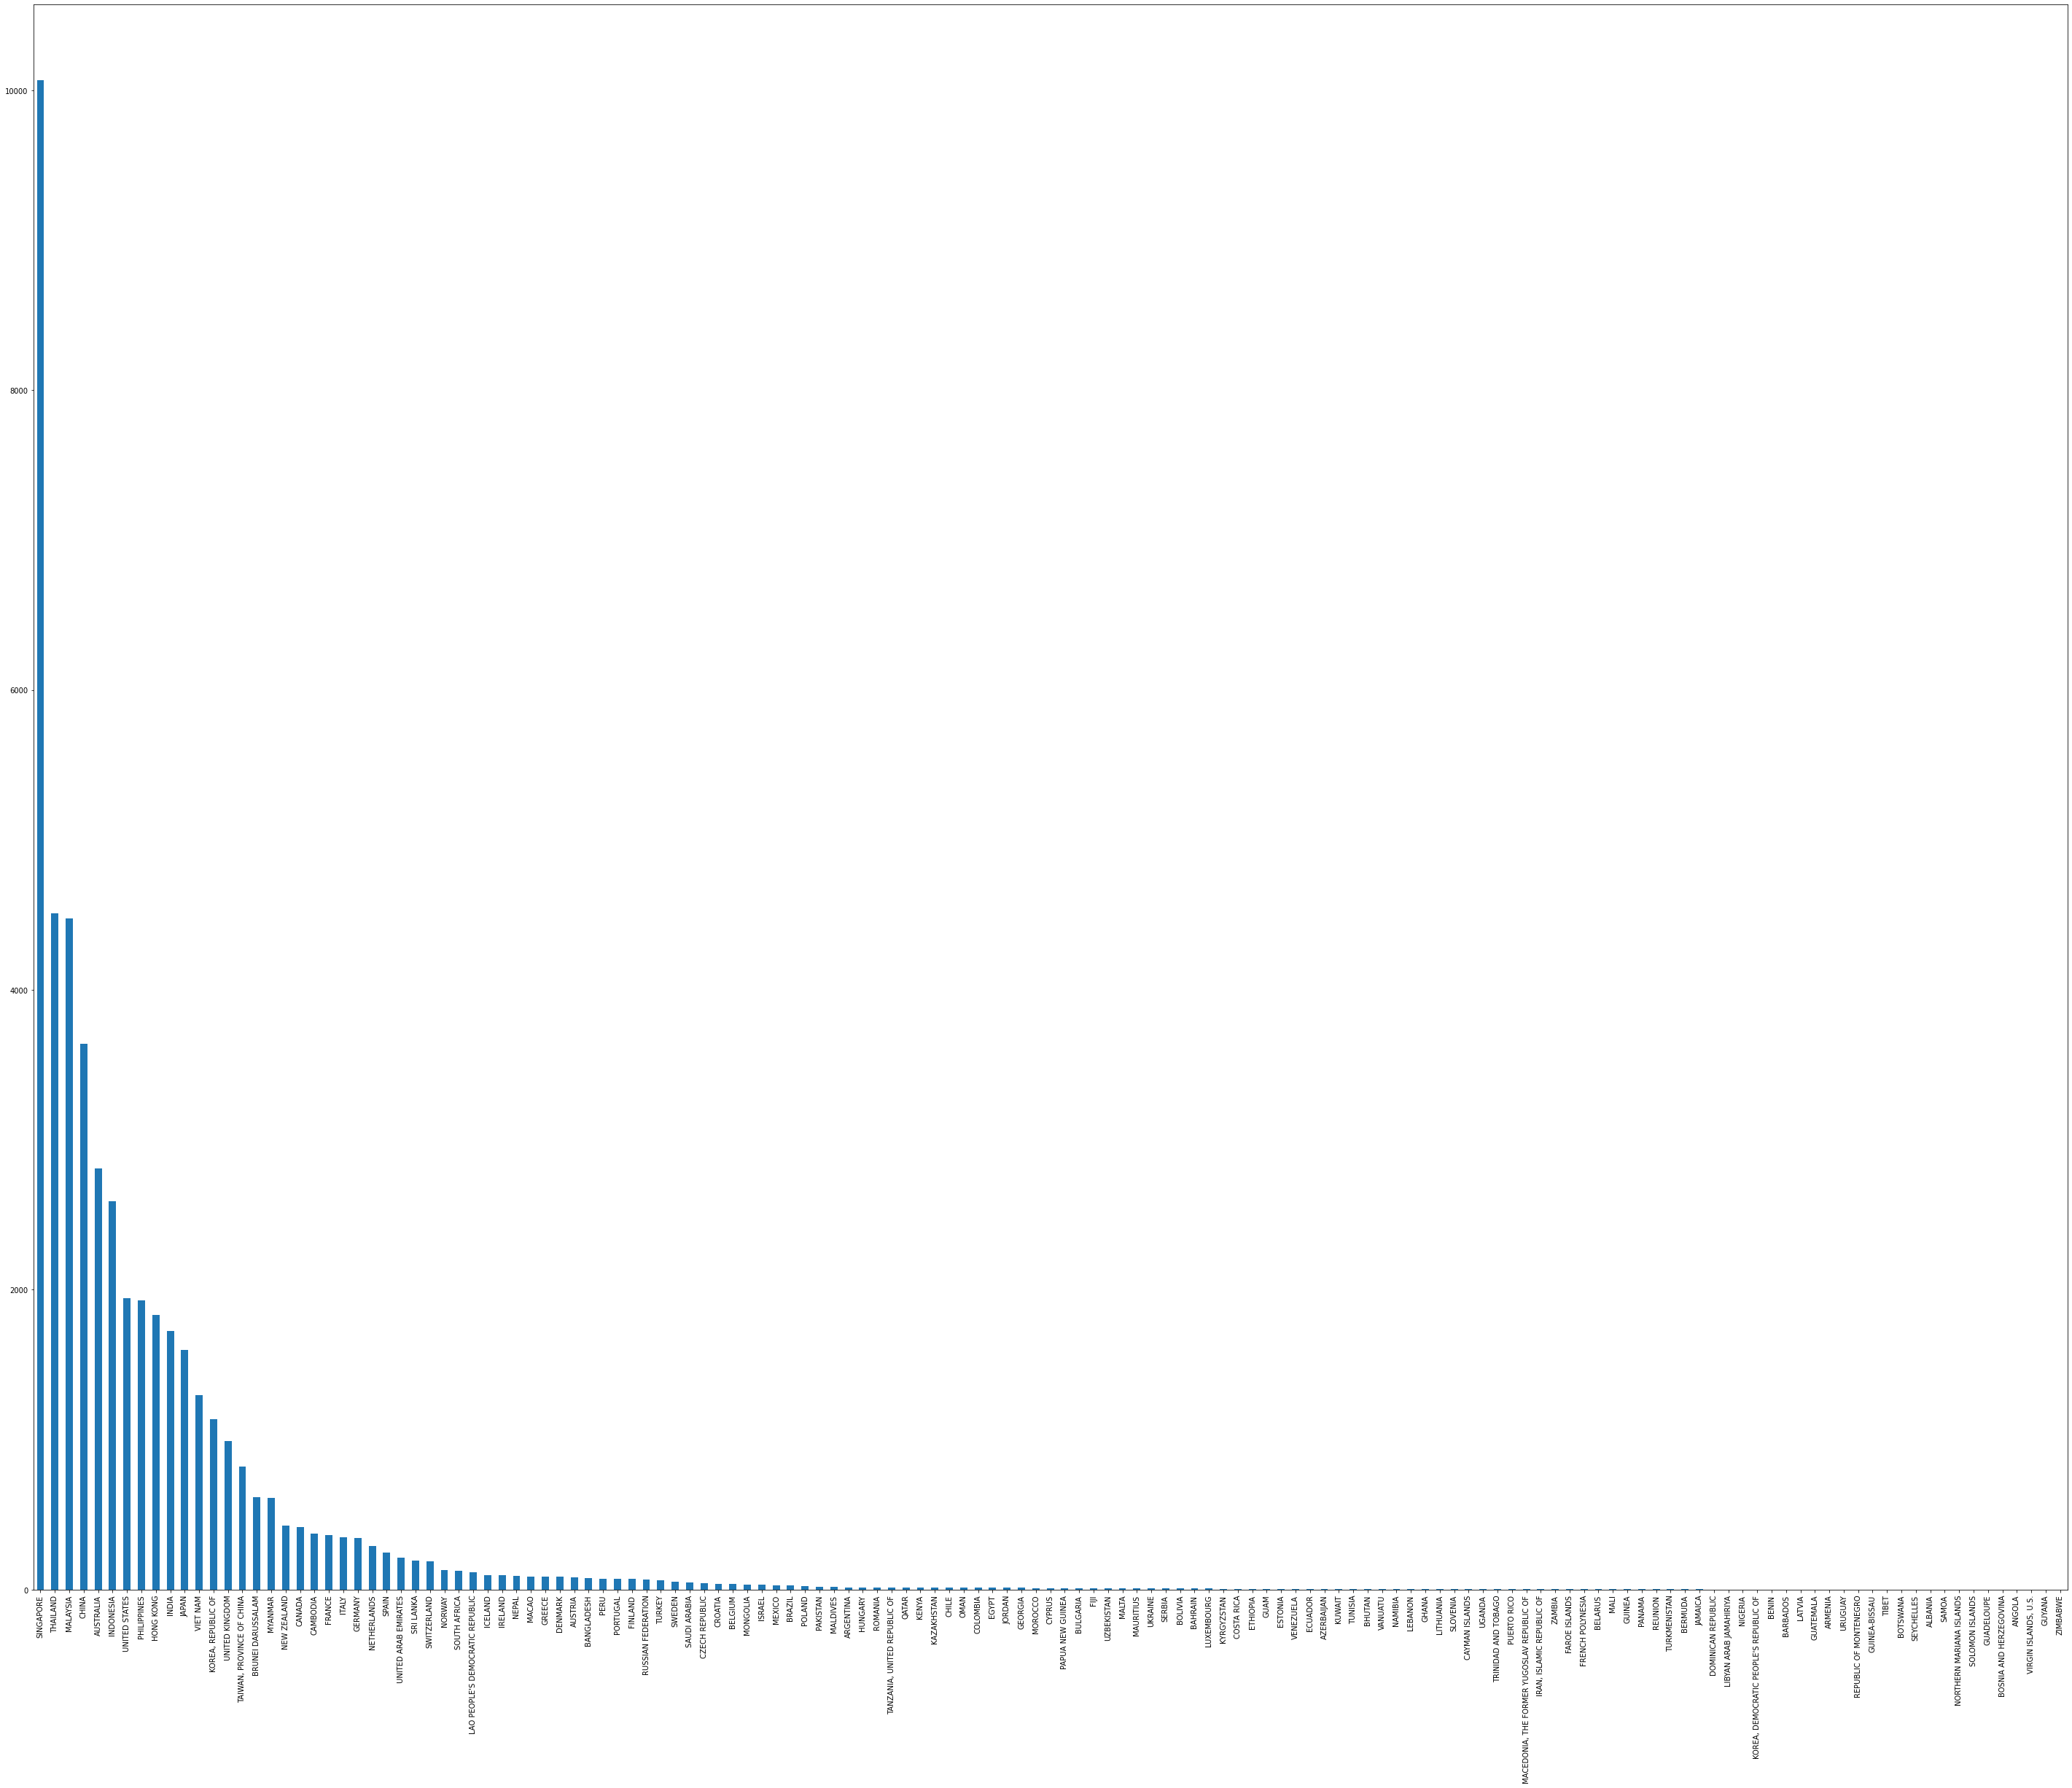

In [140]:
plt.figure(figsize=(50,40))
insurance_data.Destination.value_counts().plot(kind='bar')

plt.show()

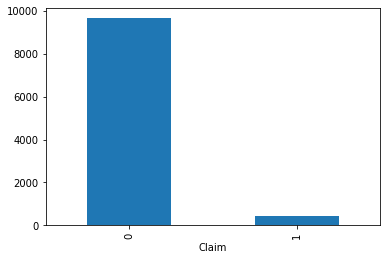

In [141]:
insurance_data[insurance_data['Destination']=='SINGAPORE'].groupby('Claim').count()['Destination'].plot(kind='bar')

In [142]:
temp = insurance_data.groupby('Destination')['Claim'].count()/len(insurance_data)
temp_df = temp[temp>0.01].index
insurance_data['Destination'] = np.where(insurance_data['Destination'].isin(temp_df),insurance_data['Destination'],"Others")
insurance_data.Destination.unique()

array(['UNITED KINGDOM', 'Others', 'UNITED STATES', 'SINGAPORE',
       'VIET NAM', 'KOREA, REPUBLIC OF', 'THAILAND', 'AUSTRALIA',
       'MALAYSIA', 'INDIA', 'TAIWAN, PROVINCE OF CHINA', 'JAPAN',
       'PHILIPPINES', 'HONG KONG', 'BRUNEI DARUSSALAM', 'MYANMAR',
       'CHINA', 'INDONESIA'], dtype=object)

In [143]:
temp_df1 = ['UNITED KINGDOM', 'UNITED STATES', 'SINGAPORE',
       'VIET NAM', 'KOREA, REPUBLIC OF', 'THAILAND', 'AUSTRALIA',
       'MALAYSIA', 'INDIA', 'TAIWAN, PROVINCE OF CHINA', 'JAPAN',
       'PHILIPPINES', 'HONG KONG', 'BRUNEI DARUSSALAM', 'MYANMAR',
       'CHINA', 'INDONESIA']
#temp_df = temp[temp>0.01].index
test_data['Destination'] = np.where(test_data['Destination'].isin(temp_df1),test_data['Destination'],"Others")
test_data.Destination.unique()

array(['HONG KONG', 'JAPAN', 'SINGAPORE', 'MALAYSIA', 'Others',
       'INDONESIA', 'KOREA, REPUBLIC OF', 'VIET NAM', 'THAILAND',
       'PHILIPPINES', 'CHINA', 'UNITED KINGDOM', 'AUSTRALIA', 'INDIA',
       'TAIWAN, PROVINCE OF CHINA', 'MYANMAR', 'UNITED STATES',
       'BRUNEI DARUSSALAM'], dtype=object)

In [144]:
insurance_data.groupby('Product Name')['Claim'].value_counts()


Product Name                          Claim
1 way Comprehensive Plan              0         2502
                                      1            8
2 way Comprehensive Plan              0         9890
                                      1          110
24 Protect                            0          183
Annual Gold Plan                      0          132
                                      1           19
Annual Silver Plan                    0          966
                                      1          122
Annual Travel Protect Gold            0           68
                                      1            9
Annual Travel Protect Platinum        0           36
Annual Travel Protect Silver          0           62
                                      1            2
Basic Plan                            0         4191
                                      1           18
Bronze Plan                           0         2905
                                      1          152
Ca

In [145]:
temp = insurance_data.groupby('Product Name')['Claim'].count()/len(insurance_data)
temp_df = temp[temp>0.01].index
insurance_data['Product Name'] = np.where(insurance_data['Product Name'].isin(temp_df),insurance_data['Product Name'],"Others")
insurance_data['Product Name'].unique()

array(['Rental Vehicle Excess Insurance', 'Cancellation Plan',
       '2 way Comprehensive Plan', 'Silver Plan',
       '1 way Comprehensive Plan', 'Basic Plan', 'Others',
       'Annual Silver Plan', 'Value Plan', 'Bronze Plan',
       'Ticket Protector'], dtype=object)

In [146]:
temp_df1 = ['Rental Vehicle Excess Insurance', 'Cancellation Plan',
       '2 way Comprehensive Plan', 'Silver Plan',
       '1 way Comprehensive Plan', 'Basic Plan',
       'Annual Silver Plan', 'Value Plan', 'Bronze Plan',
       'Ticket Protector']
#temp_df = temp[temp>0.01].index
test_data['Product Name'] = np.where(test_data['Product Name'].isin(temp_df1),test_data['Product Name'],"Others")
test_data['Product Name'].unique()

array(['Cancellation Plan', 'Rental Vehicle Excess Insurance',
       'Bronze Plan', 'Silver Plan', '2 way Comprehensive Plan', 'Others',
       'Basic Plan', '1 way Comprehensive Plan', 'Value Plan',
       'Annual Silver Plan', 'Ticket Protector'], dtype=object)

In [147]:
print(insurance_data.shape)
#insurance_data[catagorical_features] = insurance_data[categorical_features].fillna(insurance_data[categorical_features].mode().iloc[0])
insurance_data = pd.get_dummies(insurance_data, columns=categorical_feature)
print(insurance_data.shape)
insurance_data.head()

(48260, 10)
(48260, 54)


,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_Annual Silver Plan,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Others,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Ticket Protector,Product Name_Value Plan,Destination_AUSTRALIA,Destination_BRUNEI DARUSSALAM,Destination_CHINA,Destination_HONG KONG,Destination_INDIA,Destination_INDONESIA,Destination_JAPAN,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_MYANMAR,Destination_Others,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [148]:
print(test_data.shape)
#insurance_data[catagorical_features] = insurance_data[categorical_features].fillna(insurance_data[categorical_features].mode().iloc[0])
test_data = pd.get_dummies(test_data, columns=categorical_feature)
print(test_data.shape)
test_data.head()

(15832, 9)
(15832, 53)


,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_Annual Silver Plan,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Others,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Ticket Protector,Product Name_Value Plan,Destination_AUSTRALIA,Destination_BRUNEI DARUSSALAM,Destination_CHINA,Destination_HONG KONG,Destination_INDIA,Destination_INDONESIA,Destination_JAPAN,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_MYANMAR,Destination_Others,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,24,27.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51,45.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,52,21.0,0.0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,89,11.0,0.0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,10.0,0.0,33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [149]:
feature_scale = [feature for feature in insurance_data.columns if  feature not in ['Claim'] ]

In [150]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()    
#scaler.fit_transform(insurance_data[feature_scale])
#data = pd.concat([insurance_data['Claim'].reset_index(drop = True),pd.DataFrame(scaler.fit_transform(insurance_data[feature_scale]),columns = feature_scale)],axis=1)
#data.head()
#print(data.shape)

In [151]:
feature_scale

['Duration',
 'Net Sales',
 'Commision (in value)',
 'Age',
 'Agency_ADM',
 'Agency_ART',
 'Agency_C2B',
 'Agency_CBH',
 'Agency_CCR',
 'Agency_CSR',
 'Agency_CWT',
 'Agency_EPX',
 'Agency_JWT',
 'Agency_JZI',
 'Agency_KML',
 'Agency_LWC',
 'Agency_RAB',
 'Agency_SSI',
 'Agency_TST',
 'Agency_TTW',
 'Agency Type_Airlines',
 'Agency Type_Travel Agency',
 'Distribution Channel_Offline',
 'Distribution Channel_Online',
 'Product Name_1 way Comprehensive Plan',
 'Product Name_2 way Comprehensive Plan',
 'Product Name_Annual Silver Plan',
 'Product Name_Basic Plan',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Others',
 'Product Name_Rental Vehicle Excess Insurance',
 'Product Name_Silver Plan',
 'Product Name_Ticket Protector',
 'Product Name_Value Plan',
 'Destination_AUSTRALIA',
 'Destination_BRUNEI DARUSSALAM',
 'Destination_CHINA',
 'Destination_HONG KONG',
 'Destination_INDIA',
 'Destination_INDONESIA',
 'Destination_JAPAN',
 'Destination_KOREA, REPUB

In [152]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()    
##scaler.fit_transform(test_data[feature_scale])
#test_data1 = pd.DataFrame(scaler.fit_transform(test_data[feature_scale]),columns = feature_scale)
#test_data1.head()
#print(test_data1.shape)

In [153]:
test_data.shape

(15832, 53)

In [154]:
X = data.drop('Claim',axis=1)
y = data.Claim

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(33782, 53) (14478, 53)
(33782,) (14478,)


In [156]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

# fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [157]:
from sklearn.ensemble import RandomForestClassifier   # import the Random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [158]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14248
           1       0.08      0.16      0.10       230

    accuracy                           0.96     14478
   macro avg       0.53      0.56      0.54     14478
weighted avg       0.97      0.96      0.96     14478



In [159]:
from sklearn.ensemble import GradientBoostingClassifier # Import GB classifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14248
           1       0.06      0.66      0.11       230

    accuracy                           0.83     14478
   macro avg       0.53      0.74      0.51     14478
weighted avg       0.98      0.83      0.89     14478



In [160]:
prediction = rfc.predict(test_data1)
file = pd.DataFrame(prediction.reshape(len(prediction),1))
file.rename(columns={0:'prediction'}, inplace=True)
file.head(5)

,prediction
0,0
1,0
2,0
3,1
4,0


In [161]:
file.to_csv('prediction1.csv',index=False)

In [162]:
test_data1.shape

(15832, 53)

In [163]:
file.shape

(15832, 1)

In [164]:
test_data1.tail()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_Annual Silver Plan,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Others,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Ticket Protector,Product Name_Value Plan,Destination_AUSTRALIA,Destination_BRUNEI DARUSSALAM,Destination_CHINA,Destination_HONG KONG,Destination_INDIA,Destination_INDONESIA,Destination_JAPAN,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_MYANMAR,Destination_Others,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
15827,-0.491527,-0.318499,-0.488322,0.209231,-0.040558,-0.074762,-0.390415,-0.045703,-0.050955,-0.036444,-0.392989,0.890835,-0.105722,-0.330965,-0.079727,-0.102938,-0.099757,-0.128201,-0.095133,-0.040558,-0.613755,0.613755,-0.136598,0.136598,-0.239373,1.938722,-0.151232,-0.303584,-0.265021,-0.644077,-0.210049,-0.392989,-0.194308,-0.128201,-0.208074,-0.249387,-0.104802,-0.288438,-0.199671,-0.189889,-0.244057,-0.179465,-0.153187,3.069633,-0.114818,-0.364750,-0.197610,-0.517276,-0.134179,-0.320766,-0.146128,-0.200354,-0.159338
15828,3.972095,4.328626,2.664274,-1.439624,-0.040558,-0.074762,2.561376,-0.045703,-0.050955,-0.036444,-0.392989,-1.122542,-0.105722,-0.330965,-0.079727,-0.102938,-0.099757,-0.128201,-0.095133,-0.040558,1.629314,-1.629314,-0.136598,0.136598,-0.239373,-0.515804,6.612349,-0.303584,-0.265021,-0.644077,-0.210049,-0.392989,-0.194308,-0.128201,-0.208074,-0.249387,-0.104802,-0.288438,-0.199671,-0.189889,-0.244057,-0.179465,-0.153187,-0.325772,-0.114818,-0.364750,-0.197610,1.933205,-0.134179,-0.320766,-0.146128,-0.200354,-0.159338
15829,0.059537,-0.196125,0.130127,5.585934,-0.040558,-0.074762,-0.390415,-0.045703,-0.050955,-0.036444,-0.392989,-1.122542,9.458783,-0.330965,-0.079727,-0.102938,-0.099757,-0.128201,-0.095133,-0.040558,1.629314,-1.629314,-0.136598,0.136598,-0.239373,-0.515804,-0.151232,-0.303584,-0.265021,-0.644077,-0.210049,-0.392989,-0.194308,-0.128201,4.805977,-0.249387,-0.104802,-0.288438,-0.199671,5.266233,-0.244057,-0.179465,-0.153187,-0.325772,-0.114818,-0.364750,-0.197610,-0.517276,-0.134179,-0.320766,-0.146128,-0.200354,-0.159338
15830,-0.204974,-0.828387,0.104192,-0.651041,-0.040558,-0.074762,-0.390415,-0.045703,-0.050955,-0.036444,2.544597,-1.122542,-0.105722,-0.330965,-0.079727,-0.102938,-0.099757,-0.128201,-0.095133,-0.040558,-0.613755,0.613755,-0.136598,0.136598,-0.239373,-0.515804,-0.151232,-0.303584,-0.265021,-0.644077,-0.210049,2.544597,-0.194308,-0.128201,-0.208074,-0.249387,-0.104802,-0.288438,-0.199671,-0.189889,-0.244057,-0.179465,-0.153187,-0.325772,-0.114818,2.741607,-0.197610,-0.517276,-0.134179,-0.320766,-0.146128,-0.200354,-0.159338
15831,0.335070,-0.828387,-0.488322,-0.292594,-0.040558,-0.074762,-0.390415,-0.045703,-0.050955,-0.036444,-0.392989,0.890835,-0.105722,-0.330965,-0.079727,-0.102938,-0.099757,-0.128201,-0.095133,-0.040558,-0.613755,0.613755,-0.136598,0.136598,-0.239373,1.938722,-0.151232,-0.303584,-0.265021,-0.644077,-0.210049,-0.392989,-0.194308,-0.128201,-0.208074,-0.249387,-0.104802,-0.288438,-0.199671,-0.189889,-0.244057,-0.179465,-0.153187,-0.325772,-0.114818,-0.364750,5.060475,-0.517276,-0.134179,-0.320766,-0.146128,-0.200354,-0.159338


In [165]:
file.tail()

,prediction
15827,1
15828,0
15829,0
15830,0
15831,1


In [166]:
df = pd.read_csv("/content/prediction.csv")

In [167]:
df.head()

,prediction
0,1
1,0
2,0
3,1
4,0


In [168]:
df.tail()

,prediction
15827,1
15828,0
15829,0
15830,0
15831,1


In [169]:
df.reset_index(drop=True)
df.head()

,prediction
0,1
1,0
2,0
3,1
4,0
